In [1]:
# Set up the imports
%matplotlib ipympl
import numpy as np
from numpy import cos, sin, pi, exp 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:

# Fucntion definition to be taken as input by the function
def f(x):
    return x**4 - 3*x**2 + 1*x 

# Derivative definition to be taken as input by the program
def df(x):
    return 4*x**3 -6*x + 1
bestx = 5


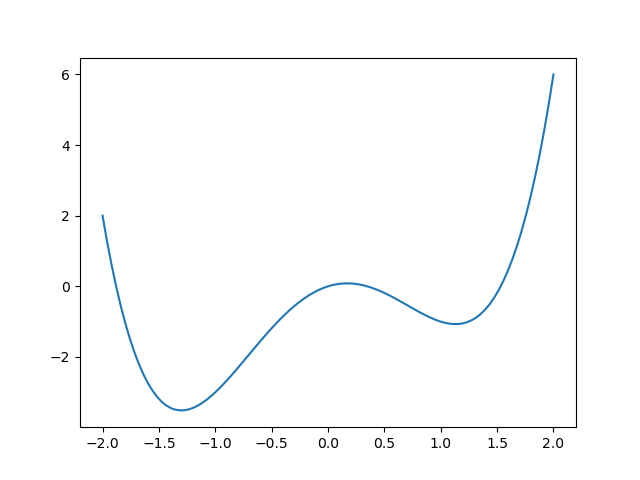

In [3]:
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Defining a functiont update the plot according to the frames being passed to it, This uses global variables funcd and func as the derivative anf the function respectively
def onestepderiv(frame):
    
    global bestcost, bestx, lr
    x = bestx - funcd(bestx) * lr 
    bestx = x
    y = func(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    return lngood,


def Plot_grad(Eqn,derivative,start,learning):
    
    global bestx, lr , func , funcd
    func = Eqn
    funcd = derivative
    xbase = np.linspace(-2, 2, 100)
    ybase = func(xbase)
    bestx = start
    plt.plot(xbase, ybase)
    lr = learning
    ani= FuncAnimation(fig, onestepderiv,frames=range(10), interval=1000, repeat=False)
    return ani

anim = Plot_grad(f,df,2,0.01)
plt.show()



# Defining and plotting the surface

In [4]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4

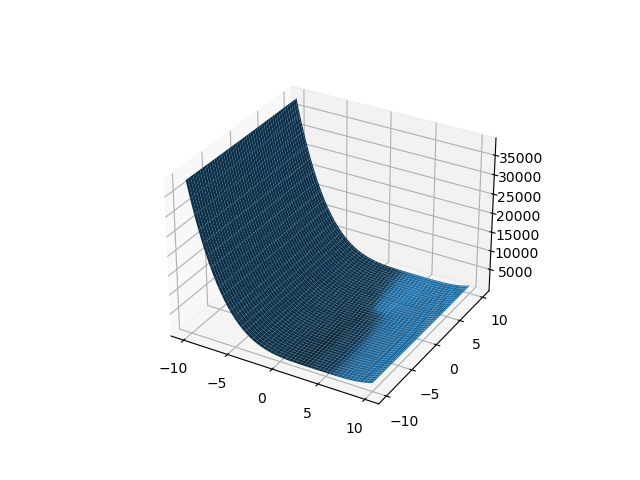

In [5]:
xbase = np.linspace(xlim3[0],xlim3[1],100)
ybase = np.linspace(ylim3[0],ylim3[1],100)

X, Y = np.meshgrid(xbase, ybase)

Z = f3(X,Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z )


In [6]:
# def var2(f3,df3_dx,df3_dy,r,lr):
x = np.linspace(r[0], r[1], 100)
y = np.linspace(r[0], r[1], 100)
X, Y = np.meshgrid(x, y)
Z = f3(X, Y)

# Set up the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, color='pink')


# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
# starting values
bestx = -0.1
besty = -0.1
xall, yall, zall = [], [], []
lnall, = ax.plot([], [], [], 'bo')
lngood, = ax.plot([], [], [], 'go', markersize=10)

def onestepderiv(frame):
    nonlocal bestx, besty
    # 2D gradient descent
    X = bestx - df3_dx(bestx, besty) * lr 
    Y = besty - df3_dy(bestx, besty) * lr 
    # updation of bestx and besty with new values
    bestx = X
    besty = Y
    Z = f3(X, Y)
    lngood.set_data([X], [Y])
    lngood.set_3d_properties([Z])
    xall.append(X)
    yall.append(Y)
    zall.append(Z)
    lnall.set_data(xall, yall)
    lnall.set_3d_properties(zall)

ani = FuncAnimation(fig, onestepderiv, frames=range(2000), interval=10, repeat=False)
#     return ani
# var2(f3,df3_dx,df3_dy,[5,5],0.05)

NameError: name 'r' is not defined

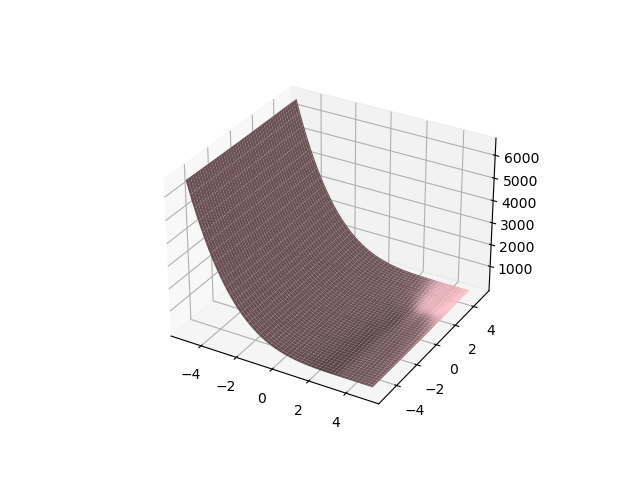

In [9]:
r = [-5,5]
x = np.linspace(r[0], r[1], 100)
y = np.linspace(r[0], r[1], 100)
X, Y = np.meshgrid(x, y)
Z = f3(X, Y)

# Set up the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, color='pink')


# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
# starting values
bestx = -0.1
besty = -0.1
xall, yall, zall = [], [], []
lnall, = ax.plot([], [], [], 'bo')
lngood, = ax.plot([], [], [], 'go', markersize=10)

def onestepderiv(frame):
    
    global bestx, besty,lr
    x = bestx - df3_dx(bestx) * lr 
    bestx = x
    y = besty - df3_dy(besty) * lr 
    bestx = x
    z = f(x,y)
    lngood.set_data([x], [y])
    lngood.set_3d_properties([x])
    xall.append(X)
    yall.append(Y)
    zall.append(Z)
    lnall.set_data(xall, yall)
    lnall.set_3d_properties(zall)
    return lngood,

def Plot_grad2():
    ani= FuncAnimation(fig, onestepderiv,frames=range(10), interval=1000, repeat=False)
    return ani

anim = Plot_grad2
plt.show()

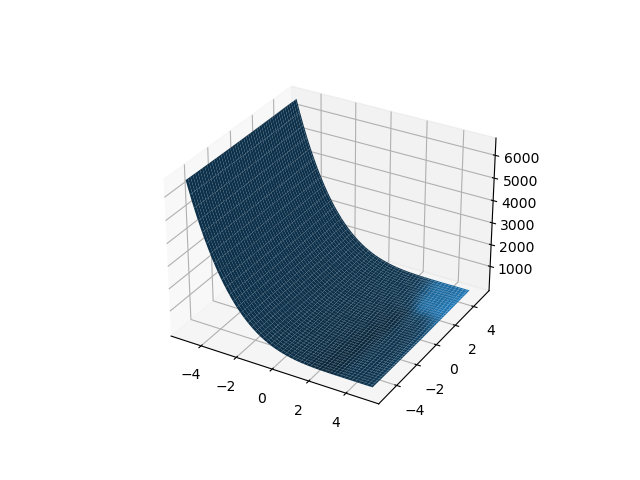

In [8]:
r =[-5,5]
x = np.linspace(r[0], r[1], 100)
y = np.linspace(r[0], r[1], 100)
X, Y = np.meshgrid(x, y)
Z = f3(X, Y)

# Set up the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z)


# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
# starting values
bestx = -0.1
besty = -0.1
xall, yall, zall = [], [], []
lnall, = ax.plot([], [], [], 'bo')
lngood, = ax.plot([], [], [], 'go', markersize=10)

def onestepderiv(frame):
    global bestx, besty
    # 2D gradient descent
    X = bestx - df3_dx(bestx, besty) * lr 
    Y = besty - df3_dy(bestx, besty) * lr 
    # updation of bestx and besty with new values
    bestx = X
    besty = Y
    Z = f3(X, Y)
#         lngood.set_data([X], [Y])
#         lngood.set_3d_properties([Z])
    xall.append(X)
    yall.append(Y)
    zall.append(Z)
    lnall.set_data(xall, yall)
    lnall.set_3d_properties(zall)

an = FuncAnimation(fig, onestepderiv, frames=range(2000), interval=10, repeat=False)

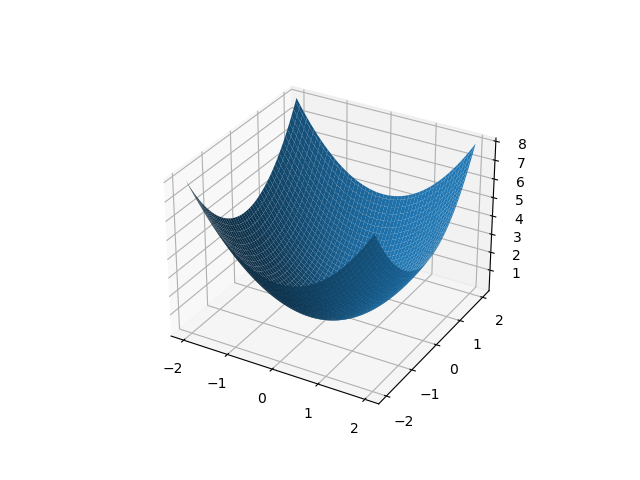

In [3]:
bestx = 1
besty = 1
lr = 0.1
xall, yall ,zall = [], [] ,[]
lnall,  = ax.plot([], [], [] , 'ro')
lngood, = ax.plot([], [], [] , 'go', markersize=10)
def onestepderiv2(frame):
    
    global bestx,besty, lr
    x = bestx - deriv2([bestx,besty])[0] * lr
    y = besty - deriv2([bestx,besty])[1] * lr
    bestx = x
    besty = y
    z = func2(x,y)
    xall.append(x)
    yall.append(y)
    zall.append(z)
    lnall.set_data(xall,yall)
    lnall.set_3d_properties(zall)
    lngood.set_data(x,y)
    lngood.set_3d_properties(z)
    # return lngood,

# for i in range(100):
#     onestepderiv2(i)
# ax.scatter(xall,yall,zall , c='r', marker='o')
ani= FuncAnimation(fig, onestepderiv2,frames=range(10), interval=1000, repeat=False,blit = True)
plt.show()

In [18]:
best = [1,1]
lr = 0.1

for i in range(100):
    real = best - np.array(deriv2(best))*lr
    best = real

print(real,func2(real[0],real[1]))

[2.03703598e-10 2.03703598e-10] 8.299031137761999e-20
